# TITANIC SURVIVAL PREDICTION
    A.Exploratory Data Analysis(EDA)
       1.Loadaing the data 
       2.Data Undrestanding 
       3.Data Cleaning 
       4.Univariate Analysis 
       5.Bivariate Analysis
       6.Multivariate Analysis 
    B.ML Model 
       7.Model Creation 
       8.Model Evaluation 

##### Importing Libraries

In [1]:
#for preprocessing 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#for prediction 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
import category_encoders as ce


import warnings
warnings.filterwarnings('ignore')

# A.Exploraly Data Analysis(EDA) ---- 

## 1.Loading the data

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')

data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2.Undrestanding the Dataset 

In [3]:
data.shape

(891, 12)

In [4]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3.Data Cleaning  

In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##### Dropping columns than not affect on the target ----


In [7]:
data= data.drop(["Name","PassengerId","Ticket","Cabin"],axis=1, errors='ignore')
data.columns


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

##### Check missing values ---

In [8]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

##### Handling missing values ---

In [9]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)




In [10]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

##### one-hot encoding 

In [11]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [12]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


## 4.Univariate Analysis 

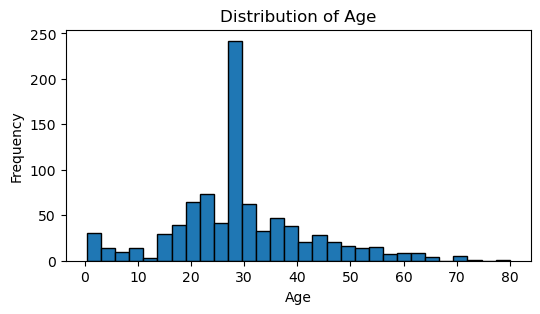

In [13]:
# Distribution of Age
plt.figure(figsize=(6, 3))
plt.hist(data['Age'], bins=30, edgecolor='k')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()




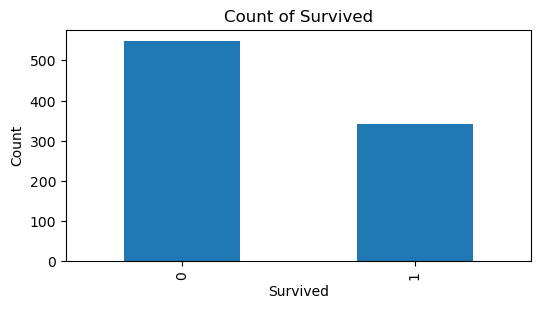

In [14]:
# Count of Survived
plt.figure(figsize=(6, 3))
data['Survived'].value_counts().plot(kind='bar')
plt.title('Count of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

## 5.Bivariate Analysis 

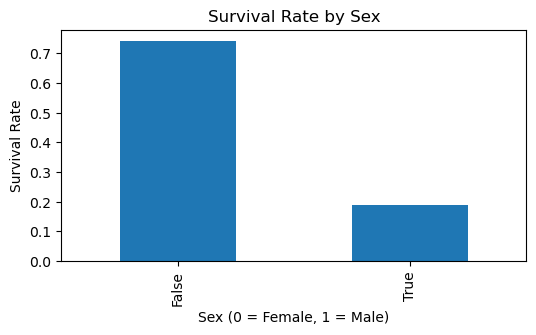

In [15]:
# Survival rate by Sex
plt.figure(figsize=(6, 3))
data.groupby('Sex_male')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Survival Rate')
plt.show()




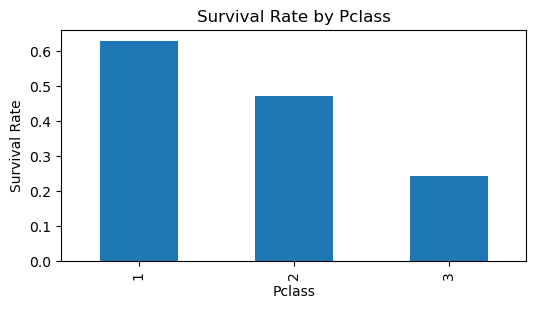

In [16]:
# Survival rate by Pclass
plt.figure(figsize=(6, 3))
data.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

## 6.Multivariate Analysis 

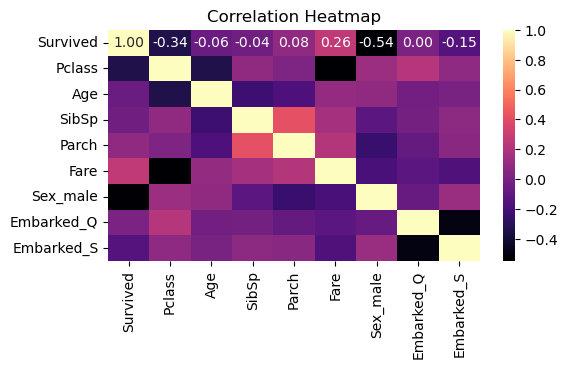

In [17]:
# Heatmap of correlations
plt.figure(figsize=(6, 3))
sns.heatmap(data.corr(), annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# B.ML Model ------

## 7.Model Creation 

#### Training 

In [19]:
x = data[['Pclass', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare','Embarked_Q','Embarked_S']]
y = data[["Survived"]]

In [25]:
## devide data into train and test 
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [26]:
x_test.shape

(179, 8)

In [27]:
x_train.shape 

(712, 8)

Using Logistic Regression 

In [28]:
model = LogisticRegression()
model.fit(x_train , y_train)

LogisticRegression()

## 8.Model Evaluation

In [29]:
y_pred=model.predict(x_test)


In [30]:
y_pred 

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [31]:

cm=confusion_matrix(y_test,y_pred)
print(cm)

[[90 15]
 [19 55]]


In [32]:
acc = accuracy_score(y_test , y_pred )
acc 

0.8100558659217877

In [33]:
recall = recall_score(y_test ,y_pred ) 
recall 

0.7432432432432432

In [34]:
precision = precision_score(y_test , y_pred)
precision 

0.7857142857142857

#### Cross Validation 

In [35]:
cross_val = cross_val_score(model,x,y,cv=10,scoring = 'accuracy')


In [36]:
cross_val 

array([0.78888889, 0.79775281, 0.74157303, 0.82022472, 0.78651685,
       0.76404494, 0.78651685, 0.78651685, 0.80898876, 0.84269663])

In [37]:
# if std() less than 0.05, we say the model is working good ............................
print('Cross validation score',cross_val.std())


Cross validation score 0.02666711378659789


In [38]:
#Training Acc 

y_pred_train = model.predict(x_train)
accuracy_score(y_pred_train,y_train)

0.800561797752809